<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/ESAA_YB3_%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 라이브러리 및 데이터**

In [4]:
# 한글 폰트 설정
# 나눔 바른 고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib


plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

print("한글 폰트 설정 완료")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train=pd.read_csv('/content/drive/MyDrive/Colab/ESAA/movies_train.csv')

# **2. 탐색적 자료 분석**

**column: 제목, 배급사, 장르, 개봉일, 상영 시간, 상영 등급, 감독, dir_prev_bfnum, dir_prev_num, 스태프 수, 주연배우 수, 박스오피스 수**

- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

###**!! 그래프로 만들 수 있는 소재가 얼마나 나올지 말해보기(한 사람당 5개씩?)**

(이연수)

배급사와 박스 오피스 수와의 관계: 박스 오피스 수가 배급사의 영향을 받을지?

장르와 주연배우 수와의 관계: 장르마다 주연배우 수가 얼마나 필요할지? 아니면 영향을 받지 않을지??

개봉일과 상영 시간의 관계: 연도에 따라 상영 시간에 관련된 유행이 있을까?

감독과 상영 시간의 관계: 감독마다 상영 시간이 비슷할지? 아니면 좀 다를지?

감독과 박스 오피스 수의 관계: 특정 감독일 때 사람들이 더 영화를 많이 볼까?

(편한비)

이전 영화의 평균 관객수와 주연 배우수의 관계 - 주연배우가 많을수록 관객수가 많다?

참여한 영화의 갯수와 상영시간의 관계 - 참여한 영화 개수가 많을수록 상영시간이 짧다?

개봉일과 장르의 분포 관계 - 여름에 호러 영화가 많을것이다?

배급사와 상영등급의 관계 - 배급사별로 선호하는 상영등급이 있을것이다?

관객수와 참여한 영화 개수 - 영화 개수가 많을수록 관객수가 높을 것이다?

In [4]:
train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
# 행과 열 수
train.shape

(600, 12)

In [6]:
# 요약
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [7]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [8]:
# num_staff가 max였던 영화
train.loc[train.num_staff.idxmax()]

,372
title,국제시장
distributor,CJ 엔터테인먼트
genre,드라마
release_time,2014-12-17
time,126
screening_rat,12세 관람가
director,윤제균
dir_prev_bfnum,NaN
dir_prev_num,0
num_staff,869


In [9]:
# num_staff가 0인 영화 >> 독립영화 같음.. box_off_num의 수가 크지 않음.
train[train.num_staff==0]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
11,무서운 집,(주)콘텐츠 윙,공포,2015-07-30,98,12세 관람가,양병간,NaN,0,0,1,1079
22,원령,조이앤시네마,공포,2015-08-13,91,15세 관람가,동지견,NaN,0,0,1,914
27,러브앤서울 복숭아마을 도색소동기,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
75,원 오브 어 카인드 3D,골든타이드픽처스,뮤지컬,2013-10-31,93,전체 관람가,손석,NaN,0,0,1,8083
87,먹이사슬,노바엔터테인먼트,멜로/로맨스,2014-09-17,100,청소년 관람불가,한동호,NaN,0,0,6,2070
88,야누스: 욕망의 두 얼굴,(주)패스파인더씨앤씨,미스터리,2014-08-14,83,청소년 관람불가,손영국,332.00,1,0,3,4122
125,하쿠나 마타타 - 지라니 이야기,이모션 픽처스,다큐멘터리,2010-12-09,90,전체 관람가,이창규,NaN,0,0,6,1253
173,법정스님의 의자,(주)키노아이,다큐멘터리,2011-05-12,75,전체 관람가,임성구,NaN,0,0,2,9438
191,꾸루꾸루와 친구들: 무지개 나무의 비밀,(주)팝엔터테인먼트,애니메이션,2015-11-19,74,전체 관람가,문제대,NaN,0,0,4,7408


In [10]:
# num_actor가 max였던 영화
train.loc[train.num_actor.idxmax()]

,80
title,바비
distributor,(주) 케이알씨지
genre,드라마
release_time,2010-02-04
time,116
screening_rat,15세 관람가
director,에밀리오 에스테베즈
dir_prev_bfnum,NaN
dir_prev_num,0
num_staff,19


In [11]:
# num_actor기 0인 영화 >> 독립영화 같음.. 다큐멘터리의 비중이 크고 box_off_num이 크지 않음.
train[train.num_actor==0]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
107,미국의 바람과 불,시네마 달,다큐멘터리,2012-07-26,118,15세 관람가,김경만,NaN,0,6,0,652
167,모래가 흐르는 강,시네마 달,다큐멘터리,2013-03-28,75,전체 관람가,지율스님,NaN,0,11,0,10942
168,망대,골든타이드픽처스,다큐멘터리,2015-03-12,66,전체 관람가,문승욱,NaN,0,13,0,65
355,오디세오,(주)패뷸러스,뮤지컬,2015-10-22,80,전체 관람가,정성복,NaN,0,0,0,862
391,명령불복종 교사,인디플러그,다큐멘터리,2015-05-14,96,전체 관람가,서동일,NaN,0,3,0,1827
418,오월愛,상구네 필름,다큐멘터리,2011-05-12,104,전체 관람가,김태일,NaN,0,4,0,4092
425,보라,시네마달,다큐멘터리,2011-11-24,136,전체 관람가,이강현,NaN,0,7,0,389
437,나쁜 나라,(주)시네마달,다큐멘터리,2015-12-03,120,12세 관람가,김진열,NaN,0,2,0,21576
456,"60년전, 사선에서",인터콘미디어,다큐멘터리,2010-06-24,63,전체 관람가,박성미,NaN,0,10,0,79


In [12]:
# 결측치 확인
train.isna().sum()
# dir_prev_bfnum의 결측치가 330.

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


In [13]:
# 결측치 특성
train[train.dir_prev_bfnum.isna()].head(5)
# dir_prev_dfnum이 na이면 dir_prev_num이 0이다. 감독의 이전 작품이 없다.

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [14]:
train[train.dir_prev_bfnum.isna()].dir_prev_num.sum() # dir_prev_dfnum인 작품의 dir_prev_num의 합이 0. 감독의 이전 작품이 없다.

np.int64(0)

In [15]:
# dir_prev_dfnum이 na인 걸 0으로 바꾸기.
train.dir_prev_bfnum.fillna(0,inplace=True)
train.dir_prev_bfnum.isna().sum() # na 없음.

np.int64(0)

In [16]:
train.release_time=pd.to_datetime(train.release_time)
train.release_time.head(5)

,release_time
0,2012-11-22
1,2015-11-19
2,2013-06-05
3,2012-07-12
4,2010-11-04


## **각 col별 특징**

### **배급사 특징**

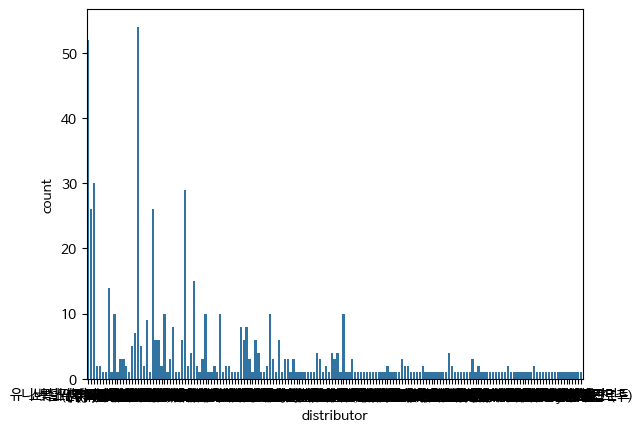

In [17]:
sns.countplot(x='distributor',data=train)
plt.show()

In [18]:
train.distributor.value_counts() # distributor별 count

,count
distributor,
CJ 엔터테인먼트,54
롯데엔터테인먼트,52
(주)NEW,30
(주)마운틴픽쳐스,29
(주)쇼박스,26
...,...
영화사 廊,1
크리에이티브컴즈(주),1
ysfilm,1


In [19]:
# 상위 10개의 distributor만 가져오기.
top10_distributor=train.distributor.value_counts().head(10)
print(top10_distributor)

distributor
CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
시너지          10
(주)키노아이      10
Name: count, dtype: int64


In [20]:
# 상위 10개 distributor의 행
top10_distributor_names=train.distributor.value_counts().head(10).index.tolist()
top10_distributor_names

top10_distributor_df=train[train.distributor.isin(top10_distributor_names)]
top10_distributor_df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


## **배급사와 박스오피스 수 관계**

배급사별로 max box off num을 구하자

In [21]:
train.groupby('distributor')
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [22]:
train_sorted_by_distributor = train.sort_values(by='distributor').reset_index(drop=True) # 배급사끼리 묶기
train_sorted_by_distributor

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,관계,(주) 브릿지웍스,멜로/로맨스,2014-08-27,91,청소년 관람불가,김명서,0.0,0,57,3,2146
1,사토미를 찾아라,(주) 브릿지웍스,코미디,2014-10-16,88,청소년 관람불가,New Pistol,0.0,0,48,8,2595
2,미스체인지,(주) 브릿지웍스,코미디,2013-09-05,100,청소년 관람불가,정초신,813164.0,1,75,4,6054
3,캠퍼스 S 커플,(주) 액티버스엔터테인먼트,멜로/로맨스,2014-05-15,108,청소년 관람불가,송창용,664267.0,2,66,4,891
4,굿바이 그리고 헬로우,(주) 액티버스엔터테인먼트,드라마,2015-12-24,82,12세 관람가,한창근,0.0,0,23,4,329
...,...,...,...,...,...,...,...,...,...,...,...,...
595,미션스쿨,홀리가든,드라마,2015-10-15,62,12세 관람가,강의석,0.0,0,3,2,152
596,인 허 플레이스,홀리가든,드라마,2015-12-17,115,청소년 관람불가,알버트 신,0.0,0,28,3,1599
597,"앵두야, 연애하자",홀리가든,드라마,2013-06-06,98,15세 관람가,정하린,0.0,0,34,4,3177
598,결정적 한방,화앤담이엔티,드라마,2011-12-07,100,15세 관람가,박중구,0.0,0,237,4,60944


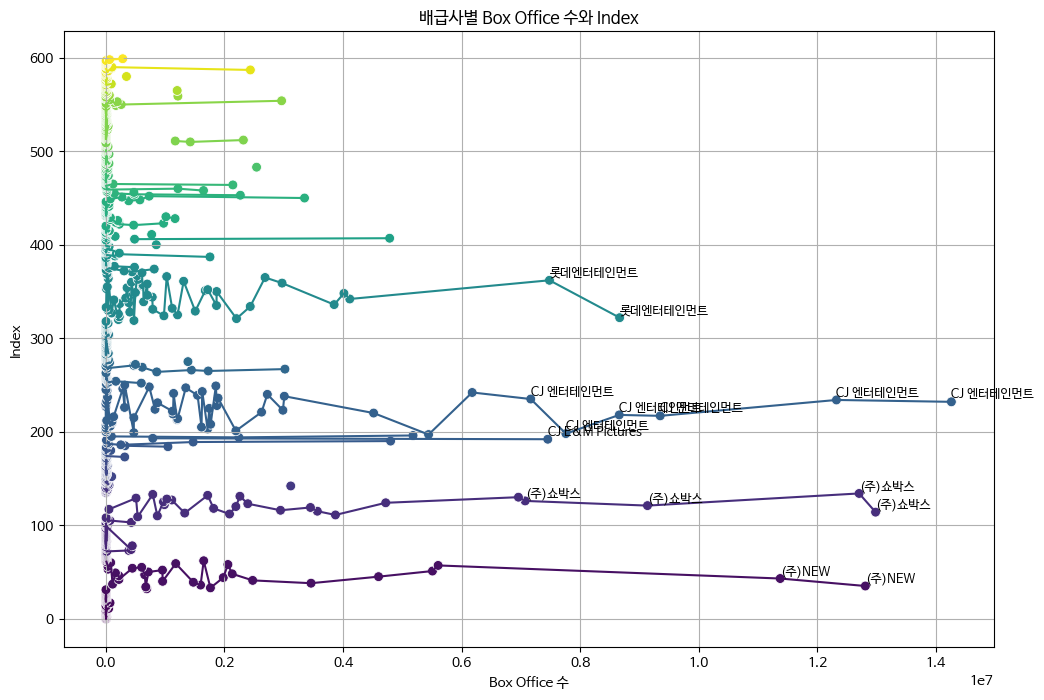

In [25]:
plt.figure(figsize=(12,8))
sns.lineplot(data=train_sorted_by_distributor, x='box_off_num', y=train_sorted_by_distributor.index, hue='distributor', palette='viridis', legend=False)
sns.scatterplot(data=train_sorted_by_distributor, x='box_off_num', y=train_sorted_by_distributor.index, hue='distributor', palette='viridis', legend=False, s=50) # 점 크기 조정

# box_off_num이 가장 큰 상위 15개 행 선택
top_15_box_off = train_sorted_by_distributor.nlargest(15, 'box_off_num')

# 상위 10개 점에 배급사 이름 주석 추가
for index, row in top_15_box_off.iterrows():
    plt.text(row['box_off_num'], row.name, row['distributor'], fontsize=9, ha='left', va='bottom')


plt.title('배급사별 Box Office 수와 Index')
plt.xlabel('Box Office 수')
plt.ylabel('Index')
plt.grid(True)
plt.show()

### **장르 특징**

In [ ]:
train.genre.value_counts() # 장르별 count

,count
genre,
드라마,221
다큐멘터리,93
멜로/로맨스,78
코미디,53
공포,42
액션,28
느와르,27
애니메이션,21
미스터리,17


## **상영 시간 특징**

In [ ]:
train.time.dtype

dtype('int64')

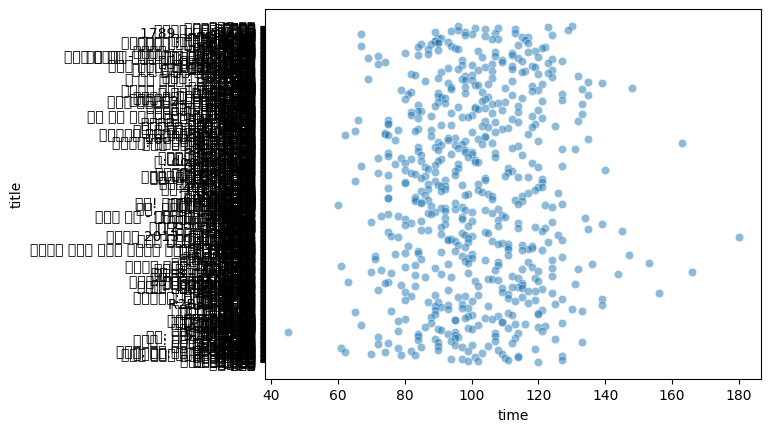

In [ ]:
sns.scatterplot(x='time',y='title',data=train,alpha=0.5)
plt.show()

## **관람가**

In [ ]:
train.screening_rat.value_counts()

,count
screening_rat,
청소년 관람불가,204
15세 관람가,202
12세 관람가,102
전체 관람가,92


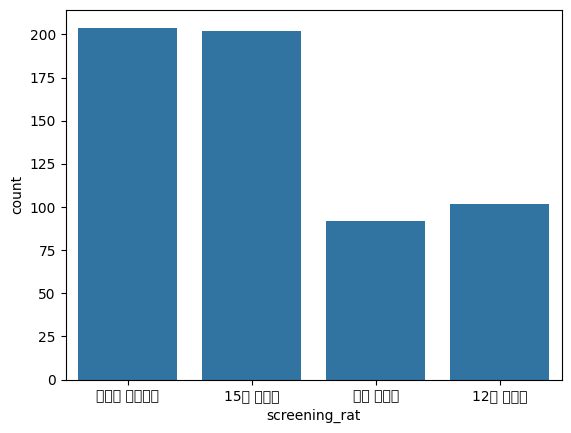

In [ ]:
sns.countplot(x='screening_rat',data=train)
plt.show()
# 순서대로 청불, 15세, 전체, 12세

## **박스오피스 숫자(관객수)**

In [ ]:
train.box_off_num

,box_off_num
0,23398
1,7072501
2,6959083
3,217866
4,483387
...,...
595,1475091
596,1716438
597,2475
598,2192525
